In [2]:
# imports

# Foursquare

Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [37]:
import requests

city_api = "http://api.citybik.es/v2/networks/metro-bike-share"

response = requests.get(city_api)

if response.status_code == 200:
    citybikes_data = response.json()
    
    company_name = data.get("network", {}).get("company", "N/A")
    
    stations = data.get("network", {}).get("stations", [])
    first_station_name = stations[0].get("name", "N/A") if stations else "No stations found"
    
    print(company_name)
    print(first_station_name)
else:
    print("Error")

N/A
No stations found


In [38]:
stations = citybikes_data.get('network', {}).get('stations', {}) 

latitudes = []
longitudes = []
number_of_bikes = []

for station in stations:
    lat = station.get("latitude", "N/A")
    lon = station.get("longitude", "N/A")
    num_bikes = station.get("free_bikes", "N/A")
    
    latitudes.append(lat)
    longitudes.append(lon)
    number_of_bikes.append(num_bikes)

print(latitudes[:5])  # Print the first 5 latitudes as a sample
print(longitudes[:5])  # Print the first 5 longitudes as a sample
print(number_of_bikes[:5])  # Print the first 5 bike counts as a sample

[34.0348, 34.03919, 34.04989, 34.05772, 34.03286]
[-118.23128, -118.23253, -118.25588, -118.24897, -118.26808]
[11, 10, 11, 6, 9]


In [39]:
import pandas as pd

citybikes_df = pd.DataFrame({
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Number of Bikes': number_of_bikes
})

citybikes_df

Latitude  Longitude  Number of Bikes
0    34.03480 -118.23128               11
1    34.03919 -118.23253               10
2    34.04989 -118.25588               11
3    34.05772 -118.24897                6
4    34.03286 -118.26808                9
..        ...        ...              ...
218  34.04804 -118.25374                4
219  34.00587 -118.42916                5
220  34.06699 -118.29088                4
221  33.99724 -118.44673                4
222  34.04621 -118.45117               12

[223 rows x 3 columns]

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [69]:
## Send a request to Foursquare with a small radius (1000m) 
## for all the bike stations in your city of choice. 
##### ............START HERE.............
import requests
import os


foursquare_api_key = os.environ.get("FOURSQUARE_API_KEY")

fs_url_template = "https://api.foursquare.com/v3/places/search?ll={latitude},{longitude}&radius=1000&limit=50&categoryId={categories}"
headers = {"Accept": "application/json"}
headers['Authorization'] = foursquare_api_key

fs_categories_group_1 = "4d4b7105d754a06374d81259,4d4b7105d754a06376d81259"  # Restaurants and Nightlife
fs_categories_group_2 = "4bf58dd8d48988d181941735,4bf58dd8d48988d163941735,4deefb944765f83613cdba6e"  # Museums, Parks, and Landmarks

foursquare_data_all = []

for station in citybikes_data["network"]["stations"][:223]:  
    latitude = station["latitude"]
    longitude = station["longitude"]
    
    # Group 1: Restaurants and Nightlife
    fs_url = url_template.format(latitude=latitude, longitude=longitude, categories=categories_group_1)
    fs_response = requests.get(fs_url, headers=headers)
    if fs_response.status_code == 200:
        fsq_data_group_1 = fs_response.json()
        foursquare_data_all.append(fsq_data_group_1)
    else:
        print(f"Error for Group 1 at {latitude},{longitude}: {fs_response.status_code}")
    
    # Group 2: Museums, Parks, and Landmarks
    fs_url = url_template.format(latitude=latitude, longitude=longitude, categories=categories_group_2)
    fs_response = requests.get(fs_url, headers=headers)
    if fs_response.status_code == 200:
        fsq_data_group_2 = fs_response.json()
        foursquare_data_all.append(fsq_data_group_2)
    else:
        print(f"Error for Group 2 at {latitude},{longitude}: {fs_response.status_code}")





In [70]:
parsed_fsq_data = []

for fsq_data_set in foursquare_data_all:
    if 'results' in fsq_data_set:
        for fsq_venue in fsq_data_set['results']:
            fsq_venue_details = {
                'business_name': fsq_venue['name'],
                'categories': ", ".join([category['name'] for category in fsq_venue['categories']]),
                'address': fsq_venue['location']['formatted_address'],
                'latitude': fsq_venue['geocodes']['main']['latitude'],
                'longitude': fsq_venue['geocodes']['main']['longitude']
            }
            parsed_fsq_data.append(fsq_venue_details)
    else:
        print(f"Missing 'results' key in data set: {fsq_data_set}")

for item in parsed_fsq_data:
    print(item)


#..........

{'business_name': 'Pizzanista', 'categories': 'Pizzeria', 'address': '2019 E 7th St, Los Angeles, CA 90021', 'latitude': 34.034828, 'longitude': -118.231642}
{'business_name': 'Afuri Ramen', 'categories': 'Ramen Restaurant', 'address': '688 Mateo St, Los Angeles, CA 90021', 'latitude': 34.03525, 'longitude': -118.232145}
{'business_name': 'Guerrilla Tacos', 'categories': 'Mexican Restaurant', 'address': '2000 E 7th St, Los Angeles, CA 90021', 'latitude': 34.034444, 'longitude': -118.231989}
{'business_name': 'Everson Rocye Bar', 'categories': 'Cocktail Bar, Wine Bar, Restaurant', 'address': '1936 E 7th St, Los Angeles, CA 90021', 'latitude': 34.03429, 'longitude': -118.232552}
{'business_name': 'Bread Lounge', 'categories': 'Bakery', 'address': '700 S Santa Fe Ave, Los Angeles, CA 90021', 'latitude': 34.034349, 'longitude': -118.229794}
{'business_name': 'Yangban Society', 'categories': 'Deli, American Restaurant, Korean Restaurant', 'address': '712 S Santa Fe Ave, Los Angeles, CA 9002

Put your parsed results into a DataFrame

In [71]:
import pandas as pd

df_fsq = pd.DataFrame(parsed_fsq_data)
df_fsq

business_name                               categories  \
0                      Pizzanista                                 Pizzeria   
1                     Afuri Ramen                         Ramen Restaurant   
2                 Guerrilla Tacos                       Mexican Restaurant   
3               Everson Rocye Bar       Cocktail Bar, Wine Bar, Restaurant   
4                    Bread Lounge                                   Bakery   
...                           ...                                      ...   
18137  Chitchat Coffee and Matcha            Café, Coffee Shop, Restaurant   
18138                    Teaspoon                          Bubble Tea Shop   
18139                Millet Crepe           Café, Dessert Shop, Restaurant   
18140               Marugame Udon                          Udon Restaurant   
18141               Bar Hermanito  Beer Bar, Cocktail Bar, Taco Restaurant   

                                                 address   latitude  \
0                   2019 E 7th St, Los Angeles, CA 90021  34.034828   
1                    688 Mateo St, Los Angeles, CA 90021  34.035250   
2                   2000 E 7th St, Los Angeles, CA 90021  34.034444   
3                   1936 E 7th St, Los Angeles, CA 90021  34.034290   
4              700 S Santa Fe Ave, Los Angeles, CA 90021  34.034349   
...                                                  ...        ...   
18137          1854 Sawtelle Blvd, Los Angeles, CA 90025  34.042749   
18138  1947 Sawtelle Blvd (La Grange), Los Angeles, C...  34.040909   
18139  2011 Sawtelle Blvd (La Grange Ave), Los Angele...  34.040497   
18140          2029 Sawtelle Blvd, Los Angeles, CA 90025  34.040138   
18141          2024 Sawtelle Blvd, Los Angeles, CA 90025  34.040455   

        longitude  
0     -118.231642  
1     -118.232145  
2     -118.231989  
3     -118.232552  
4     -118.229794  
...           ...  
18137 -118.444866  
18138 -118.444334  
18139 -118.443548  
18140 -118.443188  
18141 -118.442840  

[18142 rows x 5 columns]

# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [72]:
import requests
import os

yelp_api_key = os.environ.get("yelp_api2")

yelp_url_template = "https://api.yelp.com/v3/businesses/search?latitude={latitude}&longitude={longitude}&radius=1000&categories={categories}&limit=50"

headers = {
    "Authorization": f"Bearer {yelp_api_key}"
}

yelp_categories_group_1 = "restaurants,nightlife"
yelp_categories_group_2 = "museums,parks,landmarks"

yelp_data_all = []

for station in citybikes_data["network"]["stations"][:223]:
    latitude = station["latitude"]
    longitude = station["longitude"]
    
    # Group 1: Restaurants and Bars
    url = yelp_url_template.format(latitude=latitude, longitude=longitude, categories=yelp_categories_group_1)
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        yelp_data = response.json()
        yelp_data_all.append(yelp_data)
    else:
        print(f"Error for Yelp Group 1 at {latitude},{longitude}: {response.status_code}")
    
    # Group 2: POIs
    url = yelp_url_template.format(latitude=latitude, longitude=longitude, categories=yelp_categories_group_2)
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        yelp_data = response.json()
        yelp_data_all.append(yelp_data)
    else:
        print(f"Error for Yelp Group 2 at {latitude},{longitude}: {response.status_code}")



Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [73]:
# List to hold all parsed results
yelp_parsed_data = []

# Loop through each set of results in yelp_data_all
for yelp_data_set in yelp_data_all:
    for yelp_business in yelp_data_set['businesses']:
        yelp_business_details = {
            'business_name': yelp_business['name'],
            'categories': ", ".join([category['title'] for category in yelp_business['categories']]),
            'address': ", ".join(yelp_business['location']['display_address']),
            'rating': yelp_business['rating'],
            'latitude': yelp_business['coordinates']['latitude'],
            'longitude': yelp_business['coordinates']['longitude'],
            'review_count': yelp_business['review_count']
        }
        yelp_parsed_data.append(yelp_business_details)



Put your parsed results into a DataFrame

In [74]:

import pandas as pd

df_yelp = pd.DataFrame(yelp_parsed_data)
df_yelp


business_name                        categories  \
0                                  Bestia     Italian, Cocktail Bars, Pizza   
1                         Guerrilla Tacos    Tacos, Cocktail Bars, Beer Bar   
2                    Afuri Ramen Dumpling                    Ramen, Noodles   
3                                 Yangban            Korean, American (New)   
4           Girl & The Goat - Los Angeles                    American (New)   
...                                   ...                               ...   
13691                   Westwoof Dog Park                         Dog Parks   
13692                  Kuruvungna Springs  Landmarks & Historical Buildings   
13693  Los Angeles National Veterans Park                             Parks   
13694                       Westwood Park                             Parks   
13695            Japanese Garden Landmark  Landmarks & Historical Buildings   

                                                 address  rating   latitude  \
0                   2121 E 7th Pl, Los Angeles, CA 90021     4.5  34.033663   
1                   2000 E 7th St, Los Angeles, CA 90021     4.0  34.034456   
2                    688 Mateo St, Los Angeles, CA 90021     4.0  34.035170   
3              712 S Santa Fe Ave, Los Angeles, CA 90021     4.0  34.033941   
4         555-3 Mateo St, Ste 300, Los Angeles, CA 90013     4.5  34.040190   
...                                                  ...     ...        ...   
13691            1393 Veteran Ave, Los Angeles, CA 90024     4.0  34.053674   
13692       1439 S Barrington Ave, Los Angeles, CA 90025     5.0  34.045687   
13693  11661 San Vicente Blvd, Ste 204, Los Angeles, ...     4.0  34.055035   
13694                   Rochester, Los Angeles, CA 90024     3.0  34.053628   
13695             1835 Stoner Ave, Los Angeles, CA 90025     3.0  34.038910   

        longitude  review_count  
0     -118.229245          7531  
1     -118.232130          1152  
2     -118.232180           488  
3     -118.229608           283  
4     -118.233569          1563  
...           ...           ...  
13691 -118.444999            29  
13692 -118.458977             3  
13693 -118.459330             1  
13694 -118.446502            18  
13695 -118.453537             2  

[13696 rows x 7 columns]

# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

In [80]:
# Make a copy of both dataframes
df_fsq_copy = df_fsq.copy()
df_yelp_copy = df_yelp.copy()

In [82]:
print(df_yelp_copy.head())
print(df_fsq_copy.head())


                   business_name                      categories  \
0                         Bestia   Italian, Cocktail Bars, Pizza   
1                Guerrilla Tacos  Tacos, Cocktail Bars, Beer Bar   
2           Afuri Ramen Dumpling                  Ramen, Noodles   
3                        Yangban          Korean, American (New)   
4  Girl & The Goat - Los Angeles                  American (New)   

                                          address  rating   latitude  \
0            2121 E 7th Pl, Los Angeles, CA 90021     4.5  34.033663   
1            2000 E 7th St, Los Angeles, CA 90021     4.0  34.034456   
2             688 Mateo St, Los Angeles, CA 90021     4.0  34.035170   
3       712 S Santa Fe Ave, Los Angeles, CA 90021     4.0  34.033941   
4  555-3 Mateo St, Ste 300, Los Angeles, CA 90013     4.5  34.040190   

    longitude  review_count  
0 -118.229245          7531  
1 -118.232130          1152  
2 -118.232180           488  
3 -118.229608           283  
4 -118.2

In [83]:
print(df_yelp_copy.describe())
print(df_fsq_copy.describe())

             rating      latitude     longitude  review_count
count  13696.000000  13696.000000  13696.000000  13696.000000
mean       4.097072     34.048926   -118.311399    703.366165
std        0.583683      0.060880      0.097358   1351.554295
min        1.000000     33.540645   -118.547030      1.000000
25%        4.000000     34.027550   -118.378660     73.000000
50%        4.000000     34.048342   -118.286636    310.000000
75%        4.500000     34.066960   -118.256204    808.000000
max        5.000000     34.435530   -117.739271  18524.000000
           latitude     longitude
count  18142.000000  18142.000000
mean      34.052156   -118.321661
std        0.041746      0.077422
min       33.922401   -118.499276
25%       34.027546   -118.397338
50%       34.047540   -118.290691
75%       34.069400   -118.258080
max       34.182331   -118.215161


In [85]:
# This code is used to look for missing data
print(df_yelp_copy.isnull().sum())
print(df_fsq_copy.isnull().sum())

business_name    0
categories       0
address          0
rating           0
latitude         0
longitude        0
review_count     0
dtype: int64
business_name    0
categories       0
address          0
latitude         0
longitude        0
dtype: int64


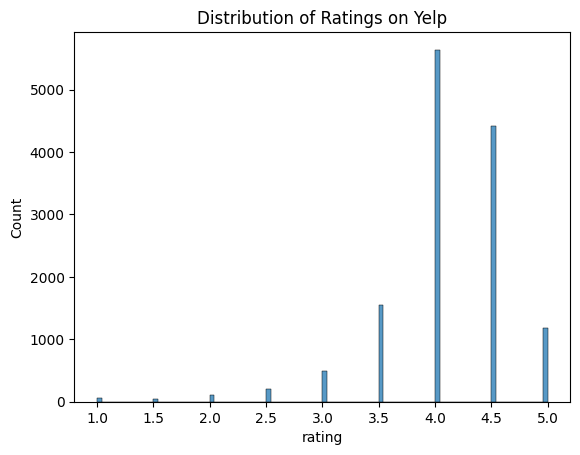

In [101]:
# Visualize the distribution of ratings on yelp
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df_yelp_copy['rating'], kde=False)
plt.title('Distribution of Ratings on Yelp')
plt.show()

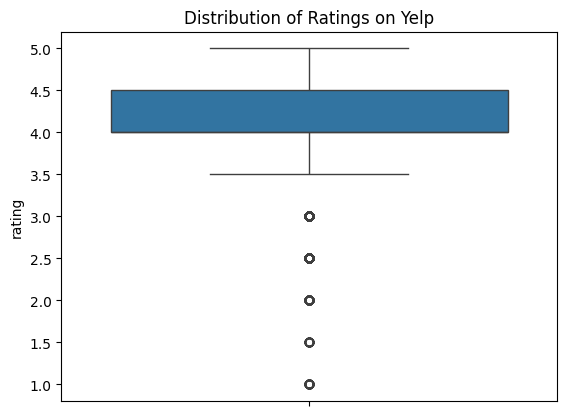

In [103]:
# Look for outliers in the rating column
sns.boxplot(df_yelp_copy['rating'])
plt.title('Distribution of Ratings on Yelp')
plt.show()

In [89]:
# Looked for how much categories did each dataframe pick up on

print(df_yelp_copy['categories'].value_counts())
print('.........................................................................')
print(df_fsq_copy['categories'].value_counts())


categories
Landmarks & Historical Buildings                             684
Parks                                                        554
Museums                                                      519
Mexican                                                      368
Sushi Bars, Japanese                                         146
                                                            ... 
American (New), Venues & Event Spaces, Vegan                   1
Cafes, Pop-Up Restaurants, Wine Bars                           1
American (Traditional), Breakfast & Brunch, Cocktail Bars      1
Mexican, Breakfast & Brunch, Bars                              1
Pizza, Gluten-Free, Salad                                      1
Name: count, Length: 1875, dtype: int64
.........................................................................
categories
Coffee Shop                              398
Grocery Store                            380
Sushi Restaurant                         302
Mexican Restau

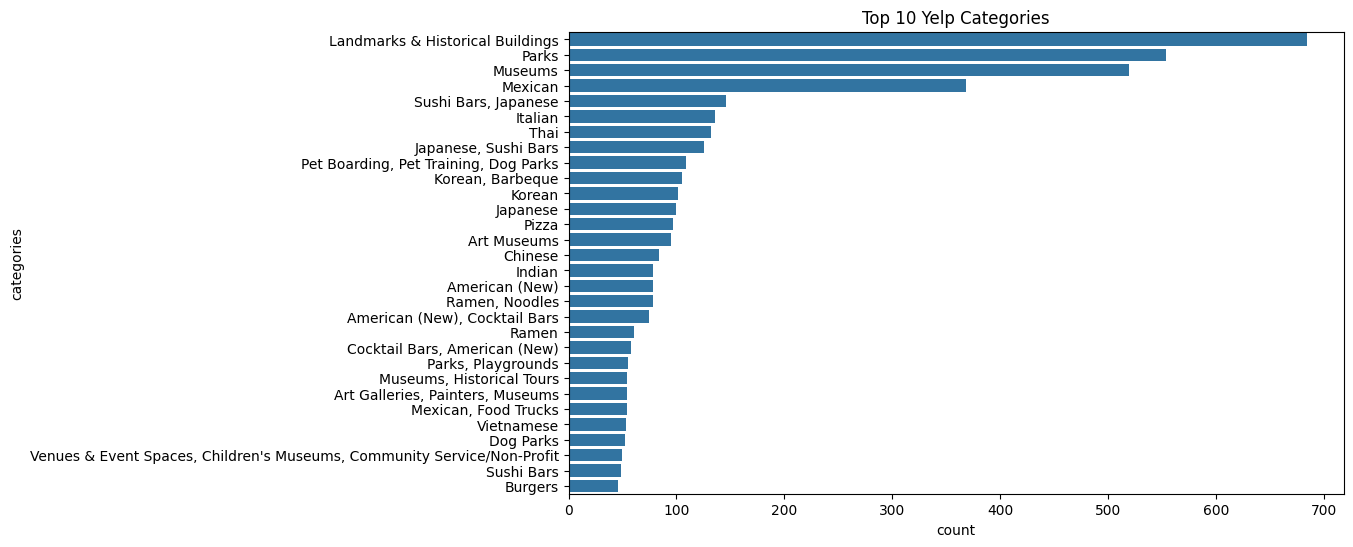

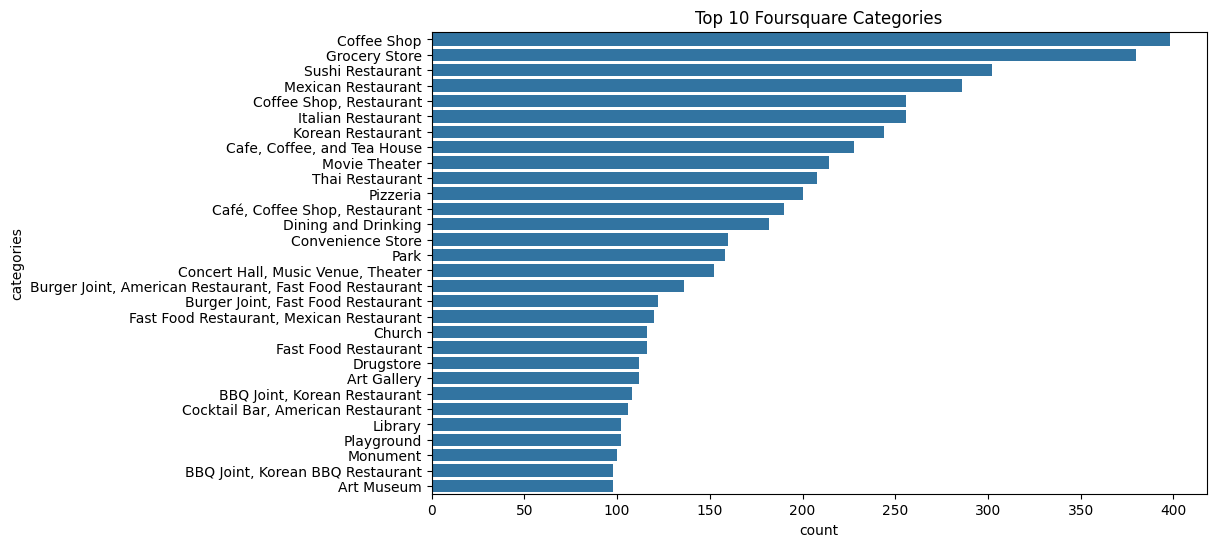

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

yelp_category_counts = df_yelp_copy['categories'].value_counts().reset_index()
yelp_category_counts.columns = ['categories', 'count']

# Plot bar graph for Yelp categories
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='categories', data=yelp_category_counts.head(30))  # Displaying top 30 for clarity
plt.title('Top 10 Yelp Categories')
plt.show()

fsq_category_counts = df_fsq_copy['categories'].value_counts().reset_index()
fsq_category_counts.columns = ['categories', 'count']

# Plot bar graph for Foursquare categories
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='categories', data=fsq_category_counts.head(30))  # Displaying top 30 for clarity
plt.title('Top 10 Foursquare Categories')
plt.show()




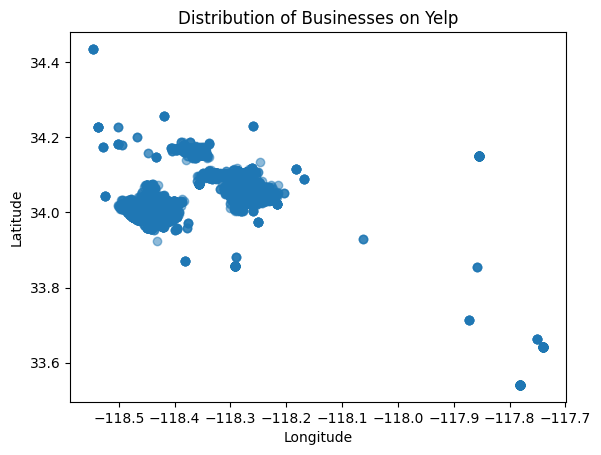

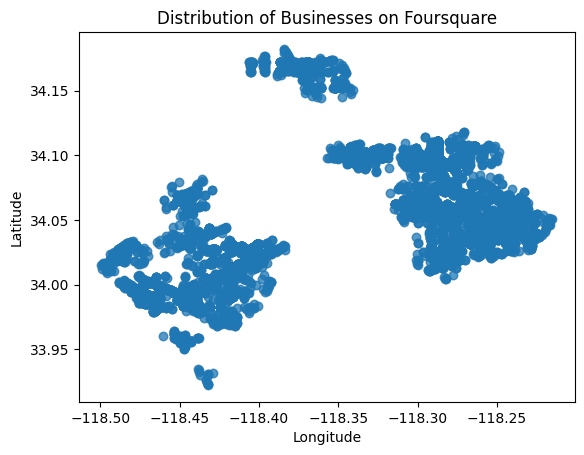

In [102]:
# Scatter graph to see the distribution of businesses on yelp and foursquare
import matplotlib.pyplot as plt

plt.scatter(df_yelp_copy['longitude'], df_yelp_copy['latitude'], alpha=0.5)
plt.title('Distribution of Businesses on Yelp')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


plt.scatter(df_fsq_copy['longitude'], df_fsq_copy['latitude'], alpha=0.5)
plt.title('Distribution of Businesses on Foursquare')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [95]:
# Check for duplicates in both dataframes matching business name and address
print(df_yelp_copy.duplicated(subset=['business_name', 'address']).sum())
print(df_fsq_copy.duplicated(subset=['business_name', 'address']).sum())

10274
15577


In [110]:
# Removed duplicates from both dataframes
df_yelp_copy.drop_duplicates(subset=['business_name', 'address'], inplace=True)
df_fsq_copy.drop_duplicates(subset=['business_name', 'address'], inplace=True)


In [111]:
# Overview of the dataframes after removing duplicates
print(df_yelp_copy.info())
print(df_fsq_copy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3422 entries, 0 to 13692
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_name  3422 non-null   object 
 1   categories     3422 non-null   object 
 2   address        3422 non-null   object 
 3   rating         3422 non-null   float64
 4   latitude       3422 non-null   float64
 5   longitude      3422 non-null   float64
 6   review_count   3422 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 213.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2565 entries, 0 to 18127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_name  2565 non-null   object 
 1   categories     2565 non-null   object 
 2   address        2565 non-null   object 
 3   latitude       2565 non-null   float64
 4   longitude      2565 non-null   float64
dtypes: float64(2), obj

In [112]:
# Summary statistics for both dataframes
print(df_yelp_copy.describe())
print(df_fsq_copy.describe())

            rating     latitude    longitude  review_count
count  3422.000000  3422.000000  3422.000000   3422.000000
mean      4.035652    34.055151  -118.341848    509.040035
std       0.609208     0.050890     0.085269    857.323124
min       1.000000    33.540645  -118.547030      1.000000
25%       4.000000    34.024538  -118.423912     65.000000
50%       4.000000    34.049926  -118.310426    239.000000
75%       4.500000    34.083369  -118.271490    611.750000
max       5.000000    34.435530  -117.739271  18524.000000
          latitude    longitude
count  2565.000000  2565.000000
mean     34.053209  -118.348332
std       0.051107     0.081960
min      33.922401  -118.499276
25%      34.017971  -118.428675
50%      34.046470  -118.335352
75%      34.085495  -118.275753
max      34.182331  -118.215161


In [114]:
# Check for missing values in both dataframes 
print(df_yelp_copy.isnull().sum())
print(df_fsq_copy.isnull().sum())


business_name    0
categories       0
address          0
rating           0
latitude         0
longitude        0
review_count     0
dtype: int64
business_name    0
categories       0
address          0
latitude         0
longitude        0
dtype: int64


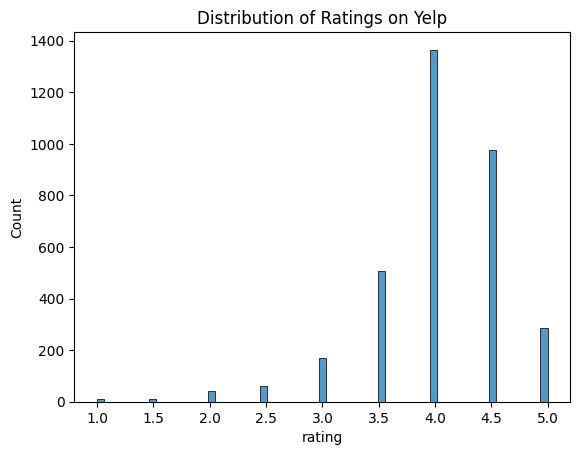

In [115]:
# Visualize the distribution of ratings on yelp after cleaning
import matplotlib.pyplot as plt
import seaborn as sns


sns.histplot(df_yelp_copy['rating'], kde=False)
plt.title('Distribution of Ratings on Yelp')
plt.show()

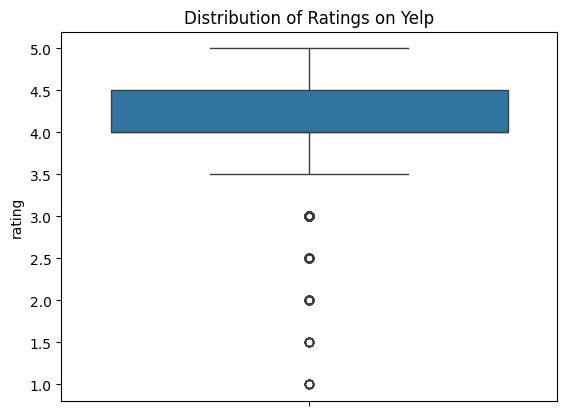

In [116]:
# Look for outliers in the rating column
sns.boxplot(df_yelp_copy['rating'])
plt.title('Distribution of Ratings on Yelp')
plt.show()

In [117]:
# Looked for how much categories did each dataframe pick up on after cleaning

print(df_yelp_copy['categories'].value_counts())
print('.........................................................................')
print(df_fsq_copy['categories'].value_counts())


categories
Mexican                                      124
Parks                                        106
Landmarks & Historical Buildings              77
Museums                                       58
Thai                                          49
                                            ... 
Armenian, Venues & Event Spaces                1
Desserts, Thai, Ice Cream & Frozen Yogurt      1
Thai, Asian Fusion, Cocktail Bars              1
Pizza, Sandwiches, Burgers                     1
Pizza, Gluten-Free, Salad                      1
Name: count, Length: 1875, dtype: int64
.........................................................................
categories
Grocery Store                                                    63
Coffee Shop                                                      48
Mexican Restaurant                                               45
Park                                                             41
Sushi Restaurant                                     

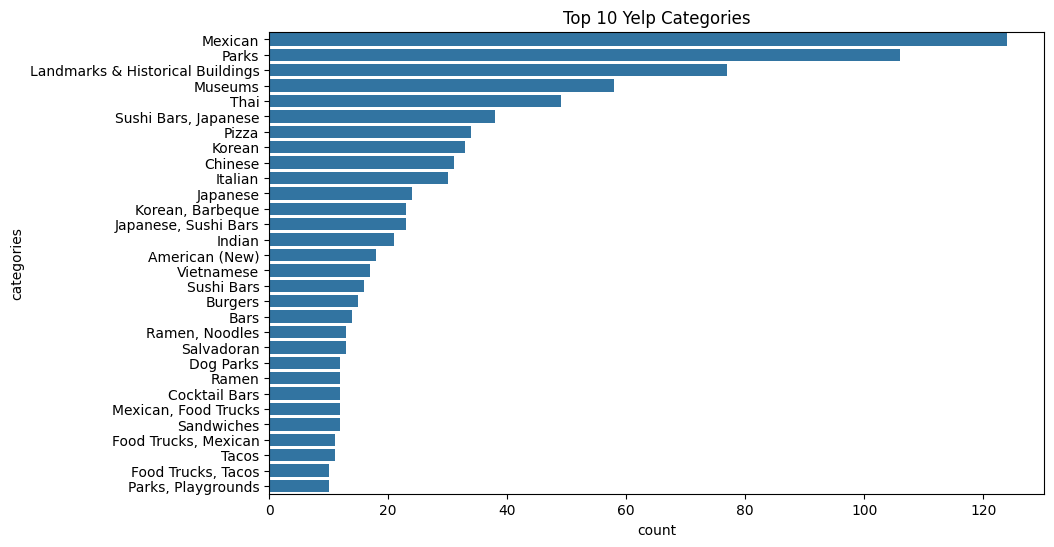

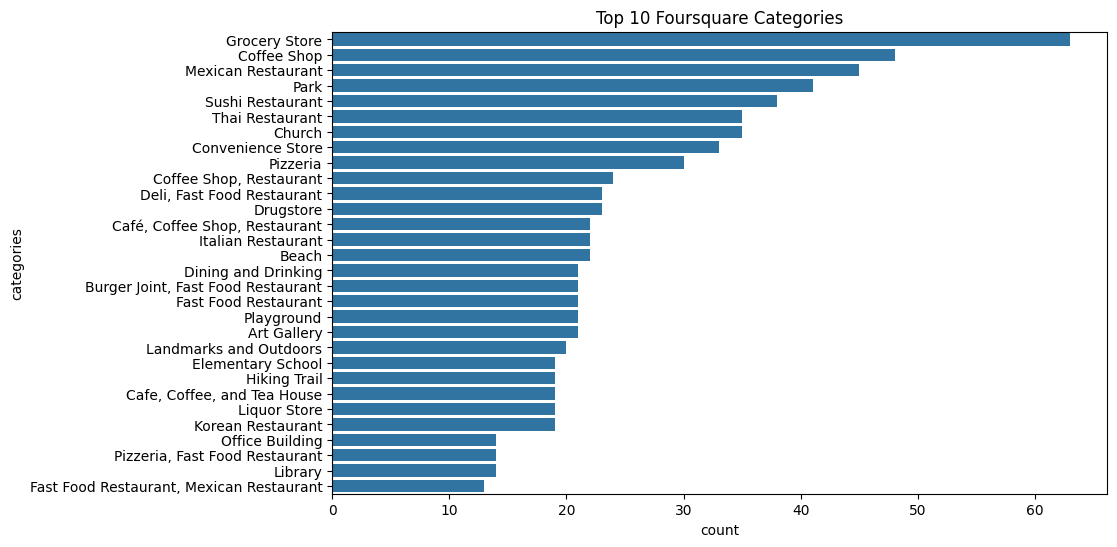

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

yelp_category_counts = df_yelp_copy['categories'].value_counts().reset_index()
yelp_category_counts.columns = ['categories', 'count']

# Plot bar graph for Yelp categories
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='categories', data=yelp_category_counts.head(30))  # Displaying top 30 for clarity
plt.title('Top 10 Yelp Categories')
plt.show()

fsq_category_counts = df_fsq_copy['categories'].value_counts().reset_index()
fsq_category_counts.columns = ['categories', 'count']

# Plot bar graph for Foursquare categories
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='categories', data=fsq_category_counts.head(30))  # Displaying top 30 for clarity
plt.title('Top 10 Foursquare Categories')
plt.show()


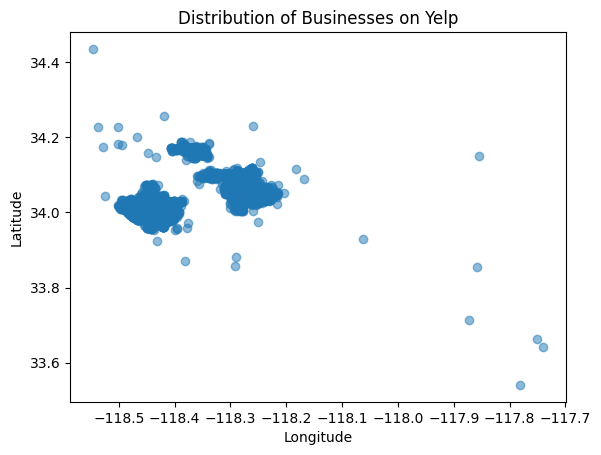

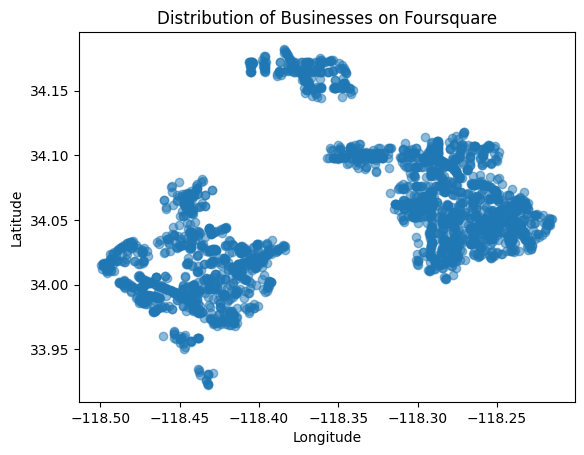

In [119]:
# Scatter graph to see the distribution of businesses on yelp and foursquare
import matplotlib.pyplot as plt

plt.scatter(df_yelp_copy['longitude'], df_yelp_copy['latitude'], alpha=0.5)
plt.title('Distribution of Businesses on Yelp')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


plt.scatter(df_fsq_copy['longitude'], df_fsq_copy['latitude'], alpha=0.5)
plt.title('Distribution of Businesses on Foursquare')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [131]:
df_yelp_copy.shape

(3422, 7)

In [130]:
df_fsq_copy.shape

(2565, 5)

Although yelp provided me with reviews and ratings, I got alot more results with Foursquare. The amount of rows I got with Foursquare was 18142 of businesses, and Yelp had a total of 13696 rows. After checking for missing values (which there were none), I went on to check for duplicates. There were about 10274 duplicates for Yelp and 15577 duplicates for Foursquare. Keep in mind I used the same amount of radius (1000m), I parametered the API to get me 50 results for each call, and I categorized each results to bring me resteraunts/ nightlife, and museums/parks/landmarks. Using the scatter plot, you can visually see the difference of both APIs, Foursquare has alot more concentration on one side of the city while Yelp had more results in a certain part of the city. Nonetheless, after removing duplicates, turns out Yelp had a greater amount of results (3422 rows) compared to foursquare (2565 rows). Another big come up was that Yelp provided me with reviews and ratings, something Foursquare hadn't within their free version (possibly on a higher subscription). For these reasons, Yelp API provided me with more complete data.

Get the top 10 restaurants according to their rating

In [124]:
restaurants = df_yelp_copy[df_yelp_copy['categories'].str.contains('Restaurants')]
Top_10 = restaurants[['business_name','rating']].sort_values(by='rating', ascending=False).head(10)
Top_10

business_name  rating
2507                 Frydays Hot Chicken     5.0
7471                          Hungry Ppl     5.0
7640                       Shanghai Walk     5.0
48    The Acey Deucey Club - Los Angeles     5.0
6039                  Señorita's Tamales     5.0
4562                               Bonmi     5.0
7847                         Mel's Brewz     5.0
9871                       House of Mash     5.0
6748                               Caile     5.0
1906                     Smoke Queen BBQ     5.0

In [127]:
df_yelp.to_csv('yelp_dataframe.csv', index=False)
df_fsq.to_csv('foursquare_dataframe.csv', index=False)


In [126]:
df_yelp_copy.to_csv('yelp_clean_copy_dataframe.csv', index=False)
df_fsq_copy.to_csv('foursquare_clean_copy_dataframe.csv', index=False)

In [128]:
citybikes_df.to_csv('citybikes_dataframe.csv', index=False)